# converting voice to text

In [23]:
import ipywidgets as widgets
from IPython.display import display
from queue import Queue
from threading import Thread

messages = Queue()
recordings = Queue()

record_button = widgets.Button(
    description='Record',
    disabled=False,
    button_style='success',
    tooltip='Record',
    icon='microphone'
)

stop_button = widgets.Button(
    description='Stop',
    disabled=False,
    button_style='warning',
    tooltip='Stop',
    icon='stop'
)

output = widgets.Output()

def start_recording(data):
    messages.put(True)
    
    with output:
        display("Starting...")
        record = Thread(target=record_microphone)
        record.start()
        transcribe = Thread(target=speech_recognition, args=(output,))
        transcribe.start()

def stop_recording(data):
    with output: 
        messages.get()
        display("Stopped.")
    
record_button.on_click(start_recording)
stop_button.on_click(stop_recording)

display(record_button, stop_button, output)

Button(button_style='success', description='Record', icon='microphone', style=ButtonStyle(), tooltip='Record')

Button(button_style='warning', description='Stop', icon='stop', style=ButtonStyle(), tooltip='Stop')

Output()

In [24]:
text_command_list = [entry['text'] for entry in output.outputs if 'output_type' in entry and entry['output_type'] == 'stream']

In [25]:
print(text_command_list)

["close the driver's door then set a string wheel to be soft after that take some photos by right camera at all i don't like this place\n"]


In [2]:
import pyaudio
p = pyaudio.PyAudio()
for i in range(p.get_device_count()):
    print(p.get_device_info_by_index(i))

p.terminate()

{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'Microphone (2- High Definition ', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'Microphone (2- High Definition ', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Output', 'hostApi': 0, 'maxInputChann

In [3]:
CHANNELS = 1
FRAME_RATE = 16000
RECORD_SECONDS = 20
AUDIO_FORMAT = pyaudio.paInt16
SAMPLE_SIZE = 2

def record_microphone(chunk=1024):
    p = pyaudio.PyAudio()

    stream = p.open(format=AUDIO_FORMAT,
                    channels=CHANNELS,
                    rate=FRAME_RATE,
                    input=True,
                    input_device_index=1,
                    frames_per_buffer=chunk)

    frames = []

    while not messages.empty():
        data = stream.read(chunk)
        frames.append(data)
        if len(frames) >= (FRAME_RATE * RECORD_SECONDS) / chunk:
            recordings.put(frames.copy())
            frames = []

    stream.stop_stream()
    stream.close()
    p.terminate()

In [4]:
import subprocess
import json
from vosk import Model, KaldiRecognizer
import time

#model = Model(model_name="vosk-model-small-en-us-0.15")
rec = KaldiRecognizer(model, FRAME_RATE)
rec.SetWords(True)
    
def speech_recognition(output):
    
    while not messages.empty():
        frames = recordings.get()
        
        rec.AcceptWaveform(b''.join(frames))
        result = rec.Result()
        text = json.loads(result)["text"]
        #print(json.loads(result))
        print(text)

In [1]:
from vosk import Model

model_path = "D:\\vosk-model-en-us-0.22"  # Replace with the actual path to the extracted model directory
model = Model(model_path)

# Data Preprocessing

In [10]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import random

#load the dataset
data = pd.read_csv("D:\\mydataset.csv")
data.info()
#Preprocessing and data augmentation steps
def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    words = text.split()
    words = [word for word in words if word.strip()]  # Remove empty strings from the list
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    processed_text = ' '.join(words)
    
    return processed_text


data['Processed_Sentence'] = data['Sentence'].apply(preprocess_text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  559 non-null    object
 1   Label     559 non-null    object
dtypes: object(2)
memory usage: 8.9+ KB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sentence            559 non-null    object
 1   Label               559 non-null    object
 2   Processed_Sentence  559 non-null    object
dtypes: object(3)
memory usage: 13.2+ KB


# Data Augmentation

In [13]:
import numpy as np
import pandas as pd
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import vstack
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Set a seed for reproducibility
random.seed(42)

# Create label encoder and convert class labels to numerical representation
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Label'])

# Create a vectorizer to convert sentences into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Processed_Sentence'])  # Use the processed sentences

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Data augmentation on the training data
augmented_data = []
label_mapping = {label: encoded_label for label, encoded_label in zip(data['Label'], y)}
for index, row in data.iterrows():
    sentence = row['Processed_Sentence']  # Use the processed sentence
    
    if index in X_train.indices:
        words = word_tokenize(sentence)
        
        # Perform data augmentation by replacing a random word with a synonym
        if len(words) > 1:
            random_word_index = random.randint(0, len(words) - 1)
            random_word = words[random_word_index]
            synsets = wordnet.synsets(random_word)
            
            if synsets:
                synonyms = synsets[0].lemmas()
                synonym = synonyms[0].name()
                words[random_word_index] = synonym
                
                augmented_sentence = ' '.join(words)
                augmented_data.append({'Processed_Sentence': augmented_sentence, 'Label': row['Label']})        
                
            elif random.random() < 0.5:
                random_word_index1 = random.randint(0, len(words) - 1)
                random_word_index2 = random.randint(0, len(words) - 1)
                words[random_word_index1], words[random_word_index2] = words[random_word_index2], words[random_word_index1]
                
                augmented_sentence = ' '.join(words)
                augmented_data.append({'Processed_Sentence': augmented_sentence, 'Label': row['Label']})

    
# Convert augmented data to DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Convert class labels to numerical representation using the custom label mapping
augmented_df['Label'] = augmented_df['Label'].map(label_mapping)

# Convert augmented data to sparse matrix
augmented_X = vectorizer.transform(augmented_df['Processed_Sentence'])

# Concatenate original and augmented training data (convert to list of sentences)
X_train = vstack([X_train, augmented_X])

# Concatenate original and augmented labels
y_train = np.concatenate([y_train, augmented_df['Label']], axis=0)


In [14]:
print(augmented_df)

                       Processed_Sentence  Label
0                         close left door      2
1           stopping_point left flap door      2
2        stopping_point left scissor door      2
3                    close left wing door      2
4                stopping_point car trunk      2
..                                    ...    ...
126    set steering wheel boost soft mode      7
127       steering wheel boost set pacify      7
128  steering wheel boost set gentle mode      7
129         guidance wheel boost set soft      7
130    steering wheel boost set soft mode      7

[131 rows x 2 columns]


# dataset info

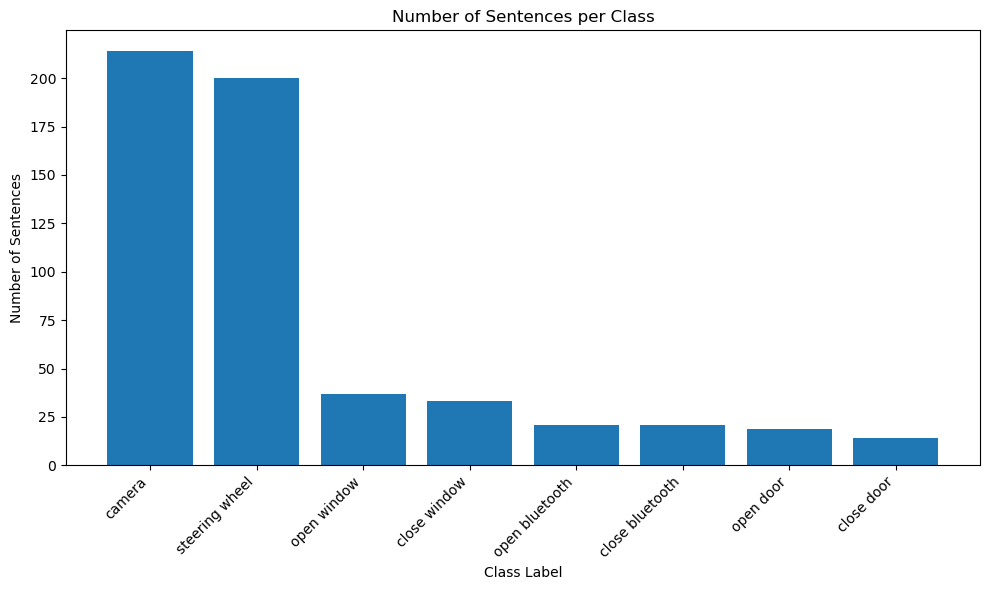

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is in a pandas DataFrame called 'data'
# and the class labels are in the 'Label' column
class_counts = data['Label'].value_counts()

# Create a bar chart to visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences per Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Classification

In [18]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create a list of classifiers
classifiers = [
    MLPClassifier(hidden_layer_sizes=(100,), random_state=42),
    LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs',random_state=42),
    RandomForestClassifier(max_depth = 5, random_state=42),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Create lists to store the results
classifier_names = []
validation_accuracies = []
test_accuracies = []

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_val_pred = classifier.predict(X_val)
    
    # Make predictions on the test set
    y_test_pred = classifier.predict(X_test)

    # Calculate accuracy on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(accuracy_val)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(accuracy_test)

    classifier_names.append(classifier.__class__.__name__)

    # Print the results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Validation Accuracy: {accuracy_val:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print("-------------------------------------------------------")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Classifier": classifier_names,
    "Validation Accuracy": validation_accuracies,
    "Test Accuracy": test_accuracies
})

print(results_df)


C:\Users\lenovo\anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier: MLPClassifier
Validation Accuracy: 0.9556
Test Accuracy: 0.9107
-------------------------------------------------------
Classifier: LogisticRegression
Validation Accuracy: 0.9778
Test Accuracy: 0.9196
-------------------------------------------------------
Classifier: RandomForestClassifier
Validation Accuracy: 0.9556
Test Accuracy: 0.8839
-------------------------------------------------------
Classifier: SVC
Validation Accuracy: 0.9778
Test Accuracy: 0.9196
-------------------------------------------------------
Classifier: GradientBoostingClassifier
Validation Accuracy: 0.9333
Test Accuracy: 0.9107
-------------------------------------------------------
                   Classifier  Validation Accuracy  Test Accuracy
0               MLPClassifier             0.955556       0.910714
1          LogisticRegression             0.977778       0.919643
2      RandomForestClassifier             0.955556       0.883929
3                         SVC             0.977778       0.

In [19]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Create a list of classifiers
classifiers = [
    MLPClassifier(hidden_layer_sizes=(100,), random_state=42),
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Create lists to store the results
classifier_names = []
mean_accuracies = []
std_deviations = []

# Train and evaluate each classifier using cross-validation
for classifier in classifiers:
    # Calculate cross-validated accuracy
    accuracies = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=5)
    
    # Store the classifier name
    classifier_names.append(classifier.__class__.__name__)

    # Calculate mean accuracy and standard deviation
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

    std_deviation = np.std(accuracies)
    std_deviations.append(std_deviation)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Classifier": classifier_names,
    "Mean Accuracy": mean_accuracies,
    "Standard Deviation": std_deviations
})

# Display the DataFrame
print(results_df)


C:\Users\lenovo\anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lenovo\anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lenovo\anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lenovo\anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\len

                   Classifier  Mean Accuracy  Standard Deviation
0               MLPClassifier       0.909857            0.021435
1          LogisticRegression       0.909892            0.017649
2      RandomForestClassifier       0.892999            0.019622
3                         SVC       0.909945            0.007457
4  GradientBoostingClassifier       0.900529            0.022745


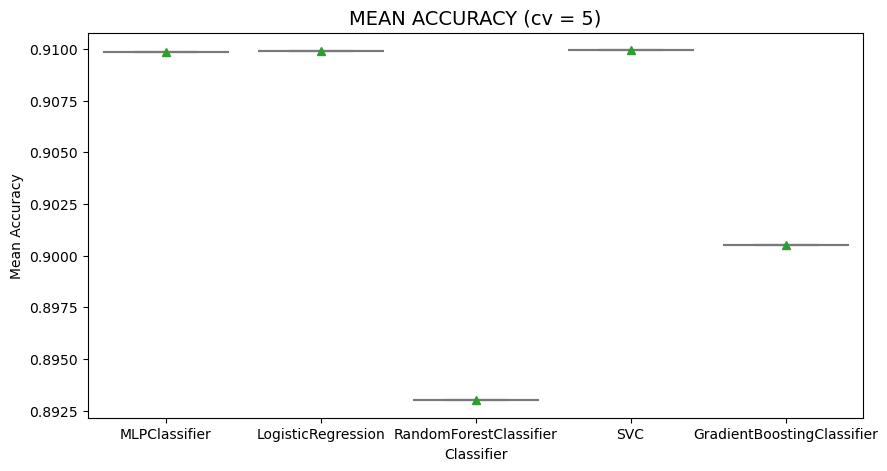

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x='Classifier', y='Mean Accuracy', 
            data=results_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)", size=14);

# Choose SVC and hypertuning

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid you want to search over
param_grid = {
    'C': [0.1, 1, 10, 100],            # Different values for the regularization parameter C
    'kernel': ['linear', 'rbf', 'poly']   # Different kernel functions to try
}

# Create a classifier
classifier = SVC(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (classifier with the best hyperparameters)
best_classifier = grid_search.best_estimator_

# Make predictions on the validation set using the best classifier
y_val_pred = best_classifier.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Best Classifier: {best_classifier.__class__.__name__}")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Make predictions on the test set using the best classifier
y_test_pred = best_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate a classification report on the validation set
class_names = label_encoder.classes_
classification_rep = classification_report(y_val, y_val_pred, labels=np.arange(len(class_names)), target_names=class_names, zero_division=1)
print("Classification Report:\n", classification_rep)


Best Classifier: SVC
Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Validation Accuracy: 0.9778
Test Accuracy: 0.9196
Classification Report:
                  precision    recall  f1-score   support

         camera       1.00      1.00      1.00        17
close bluetooth       1.00      1.00      1.00         2
     close door       0.00      1.00      0.00         0
   close window       1.00      1.00      1.00         0
 open bluetooth       1.00      1.00      1.00         1
      open door       1.00      1.00      1.00         3
    open window       1.00      1.00      1.00         3
 steering wheel       1.00      0.95      0.97        19

      micro avg       0.98      0.98      0.98        45
      macro avg       0.88      0.99      0.87        45
   weighted avg       1.00      0.98      0.99        45



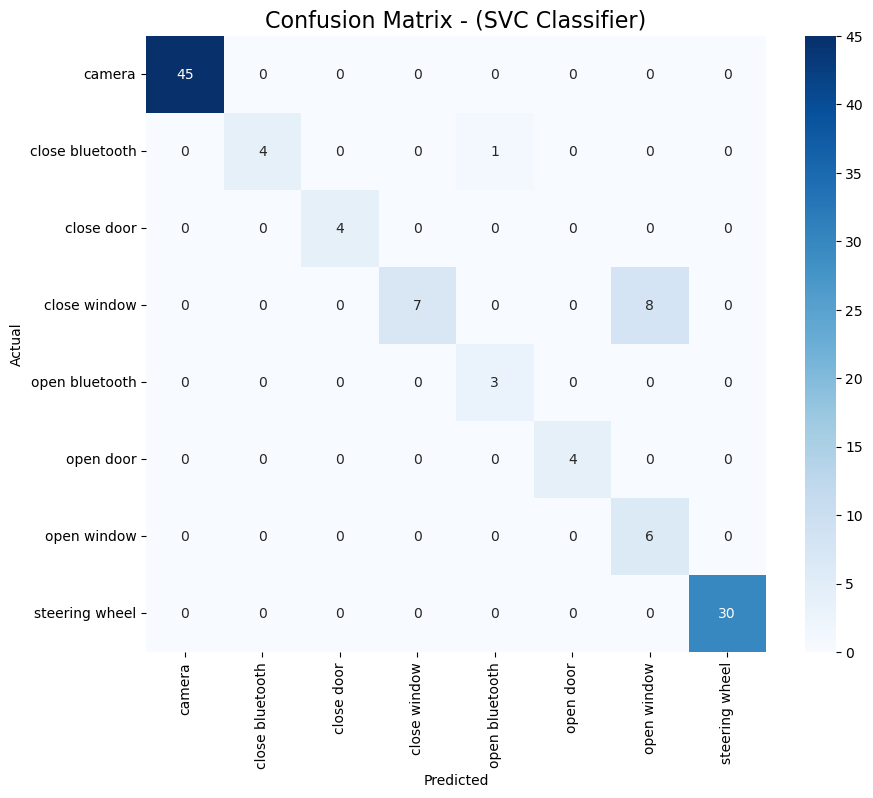

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix - (SVC Classifier)", size=16)

plt.show()

# prediction by SVC

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC


def process_overlapping_windows(window_text, classifier, label_encoder, count_vectorizer):
    # Predict the class labels for the current window
    predicted_labels = predict_commands_svc(classifier, label_encoder, count_vectorizer, [window_text],0.4)

    # Get the predicted class label for the current window (since we only have one text in the list)
    predicted_label = predicted_labels[0]

    return predicted_label

for text in text_command_list:
    print('the command:')
    text = text.strip()
    print(text)
    
    # Process each element in the input data using overlapping windows
    window_size = 11
    step_size = 7

    # Initialize variables to store accumulated text and its predicted label
    accumulated_text = ""
    accumulated_label = None
    all_predictions = []

    # Loop through each character in the input data
    for char in text:
        # Append the new character to the accumulated text
        accumulated_text += char

        # Check if the accumulated text is large enough to process a window
        if len(accumulated_text) >= window_size:
            # Get the current window text
            window_text = accumulated_text[:window_size]
            accumulated_text = accumulated_text[step_size:]

            # Process the overlapping window and get the predicted label
            predicted_label = process_overlapping_windows(window_text, classifier, label_encoder, count_vectorizer)

            # Update the accumulated label
            accumulated_label = predicted_label

            # Save the window text and its predicted label
            all_predictions.append((window_text, predicted_label))
            
    # Define a mapping of numeric labels to their corresponding names
    label_name_mapping = {
        '0': 'camera',
        '1': 'stop bluetooth',
        '2': 'close door',
        '3': 'close window',
        '4': 'open bluetooth',
        '5': 'open door',
        '6': 'open window',
        '7': 'steering wheel',
        'Unknown': 'Unknown'
    }
    
    # Print the predicted labels for each window
    for window_text, predicted_label in all_predictions:
        predicted_label_name = label_name_mapping[predicted_label]
        print(f"Window Text: {window_text}, Predicted Label: {predicted_label_name}")


the command:
close the driver's door then set a string wheel to be soft after that take some photos by right camera at all i don't like this place
Window Text: close the d, Predicted Label: close door
Window Text: he driver's, Predicted Label: Unknown
Window Text: er's door t, Predicted Label: close door
Window Text: or then set, Predicted Label: Unknown
Window Text:  set a stri, Predicted Label: Unknown
Window Text: string whee, Predicted Label: Unknown
Window Text: wheel to be, Predicted Label: steering wheel
Window Text: o be soft a, Predicted Label: Unknown
Window Text: ft after th, Predicted Label: Unknown
Window Text: r that take, Predicted Label: Unknown
Window Text: take some p, Predicted Label: Unknown
Window Text: me photos b, Predicted Label: Unknown
Window Text: os by right, Predicted Label: Unknown
Window Text: ight camera, Predicted Label: camera
Window Text: mera at all, Predicted Label: Unknown
Window Text:  all i don', Predicted Label: Unknown
Window Text: don't like ,

# finding the best threshold for SVC

Threshold: 0.90, Precision: 0.8000, Recall: 0.7333, F1-Score: 0.7638
Threshold: 0.80, Precision: 0.8667, Recall: 0.8222, F1-Score: 0.8432
Threshold: 0.70, Precision: 0.9333, Recall: 0.8444, F1-Score: 0.8765
Threshold: 0.60, Precision: 0.9333, Recall: 0.9111, F1-Score: 0.9219
Threshold: 0.50, Precision: 0.9778, Recall: 0.9333, F1-Score: 0.9516
Threshold: 0.40, Precision: 0.9889, Recall: 0.9778, F1-Score: 0.9778
Threshold: 0.30, Precision: 0.9889, Recall: 0.9778, F1-Score: 0.9778
Threshold: 0.20, Precision: 0.9889, Recall: 0.9778, F1-Score: 0.9778
Threshold: 0.10, Precision: 0.9889, Recall: 0.9778, F1-Score: 0.9778


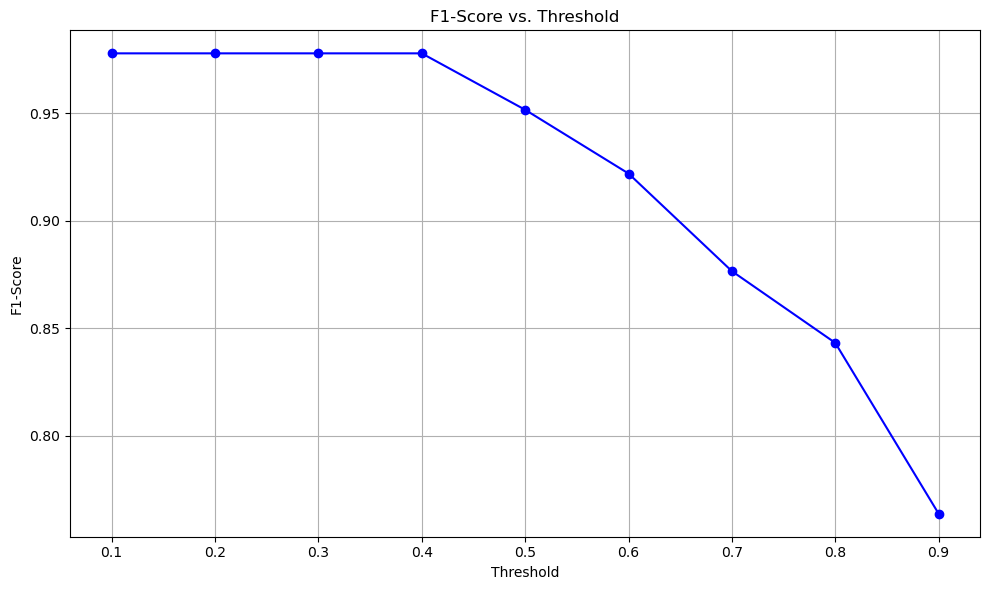

Best Threshold: 0.40, Best F1-Score: 0.9778


In [42]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer on the preprocessed data
sentences = data['Processed_Sentence'].tolist()
count_vectorizer.fit(sentences)

# Create a classifier
classifier = SVC(probability=True)

# Train the classifier
classifier.fit(X_train, y_train)

label_encoder.fit(np.append(y_train, "Unknown"))


def predict_commands_svc(classifier, label_encoder, count_vectorizer, texts, threshold):
    # Convert the input texts into feature vectors
    X_new = count_vectorizer.transform(texts)

    # Predict the probabilities of all classes using the trained classifier
    predicted_probs = classifier.predict_proba(X_new)

    predicted_labels = []
    for probs in predicted_probs:
        predicted_class_index = probs.argmax()

        predicted_class_prob = probs[predicted_class_index]

        # If the probability is below the threshold, label it as "Unknown"
        if predicted_class_prob < threshold:
            predicted_class_label = "Unknown"
        else:
            predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

        predicted_labels.append(predicted_class_label)
    return predicted_labels


# Define the threshold range
threshold_range = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

best_f1_score = 0
best_threshold = 0

X_val_texts = count_vectorizer.inverse_transform(X_val)
#y_val_encoded = label_encoder.transform(y_val)
X_val_texts = [' '.join(tokens) for tokens in X_val_texts]

f1_scores = []

# Iterate over the threshold values
for threshold in threshold_range:
    # Make predictions using the current threshold
    predicted_labels = predict_commands_svc(classifier, label_encoder, count_vectorizer, X_val_texts, threshold)
    # Calculate evaluation metrics
    predicted_labels_encoded = label_encoder.transform(predicted_labels)
    precision = precision_score(y_val, predicted_labels_encoded, average='weighted', zero_division=0)
    recall = recall_score(y_val, predicted_labels_encoded, average='weighted', zero_division=0)
    f1 = f1_score(y_val, predicted_labels_encoded, average='weighted', zero_division=0)
    
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    f1_scores.append(f1)  
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
        
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_range, f1_scores, marker='o', linestyle='-', color='b')
plt.title("F1-Score vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.grid(True)
plt.xticks(threshold_range)
plt.tight_layout()
plt.show()

print(f"Best Threshold: {best_threshold:.2f}, Best F1-Score: {best_f1_score:.4f}")
